# Learning Week 5

Questions provided here: 
https://work.caltech.edu/homework/hw5.pdf

In [24]:
# Load modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__ import division
from __future__ import print_function
np.random.seed(0)

## Question 5: Gradient Descent

In [4]:
# Function to optimize
def error_func (w):
    u,v = w[0], w[1]
    return (u*np.exp(v) - 2*v*np.exp(-u))**2
# Partial derivatives
def grad(w):
    u,v = w[0], w[1]
    partial_u = 2*(u*np.exp(v) - 2*v*np.exp(-u))*(np.exp(v) + 2*v*np.exp(-u))
    partial_v = 2*(u*np.exp(v) - 2*v*np.exp(-u))*(u*np.exp(v) - 2*np.exp(-u))
    return np.array([partial_u, partial_v])

def gradient_descent(iters):
    # Initialize at (1,1)
    learning_rate = 0.1
    w = np.array([1,1])
    print ("Initial weights: {}".format(w))
    print ("Initial error: {}".format(error_func(w)))
    
    # Iterate
    for i in range(iters):
        w = w - learning_rate*grad(w)
        print ("Iteration {}".format(i+1))
        print ("\tCurrent weights: {}".format(w))
        print ("\tCurrent error: {}".format(error_func(w)))
    
gradient_descent(10)

Initial weights: [1 1]
Initial error: 3.93039723188
Iteration 1
	Current weights: [-0.36954299  0.21392055]
	Current error: 1.15950972997
Iteration 2
	Current weights: [ 0.03052069 -0.50793405]
	Current error: 1.00740748296
Iteration 3
	Current weights: [ 0.10752311 -0.12221026]
	Current error: 0.0990091216273
Iteration 4
	Current weights: [ 0.06564483 -0.01516656]
	Current error: 0.00866064536281
Iteration 5
	Current weights: [ 0.04784117  0.0184899 ]
	Current error: 0.000181755791728
Iteration 6
	Current weights: [ 0.04499946  0.02349925]
	Current error: 1.29723984784e-06
Iteration 7
	Current weights: [ 0.04475602  0.0239243 ]
	Current error: 7.29152469846e-09
Iteration 8
	Current weights: [ 0.04473775  0.02395617]
	Current error: 4.00999789056e-11
Iteration 9
	Current weights: [ 0.04473639  0.02395854]
	Current error: 2.20168344841e-13
Iteration 10
	Current weights: [ 0.04473629  0.02395871]
	Current error: 1.20868339442e-15


## Question 7: Coordinate Descent

In [5]:
def coordinate_descent(iters):
    # Initialize at (1,1)
    learning_rate = 0.1
    w = np.array([1,1])
    print ("Initial weights: {}".format(w))
    print ("Initial error: {}".format(error_func(w)))
    
    # Iterate
    for i in range(iters):
        # Step along u
        w = w - learning_rate * np.array([grad(w)[0], 0])
        # Step along v
        w = w - learning_rate * np.array([0, grad(w)[1]])
        print ("Iteration {}".format(i+1))
        print ("\tCurrent weights: {}".format(w))
        print ("\tCurrent error: {}".format(error_func(w)))

coordinate_descent(15)

Initial weights: [1 1]
Initial error: 3.93039723188
Iteration 1
	Current weights: [-0.36954299 -2.03992288]
	Current error: 34.2901631123
Iteration 2
	Current weights: [ 6.39247376 -2.17869889]
	Current error: 0.534142591372
Iteration 3
	Current weights: [ 6.37699523 -2.28347262]
	Current error: 0.432660827324
Iteration 4
	Current weights: [ 6.36460749 -2.36821379]
	Current error: 0.365039735019
Iteration 5
	Current weights: [ 6.35427659 -2.43959481]
	Current error: 0.31646807536
Iteration 6
	Current weights: [ 6.34542086 -2.50137528]
	Current error: 0.279763423064
Iteration 7
	Current weights: [ 6.33767806 -2.55589957]
	Current error: 0.250986311675
Iteration 8
	Current weights: [ 6.33080628 -2.60473485]
	Current error: 0.227783298944
Iteration 9
	Current weights: [ 6.32463553 -2.64898351]
	Current error: 0.208656695724
Iteration 10
	Current weights: [ 6.31904159 -2.689452  ]
	Current error: 0.192605658614
Iteration 11
	Current weights: [ 6.31393077 -2.72674885]
	Current error: 0.1789

Coordinate descent performs substantially worse than the plain gradient descent algorithm.

## Question 8: Logistic Regression, with SGD

In [6]:
from numpy.random import uniform
# Define function to generate random points
def generate_points(N):
    """
    Input: number of random points to be generated in [-1,1]x[-1,1]
    Output: coordinates of points, adding x0 = 1's
    """
    xs = uniform(-1,1,N)
    ys = uniform(-1,1,N)
    # Generate vector of ones in the 0th column
    return np.array(zip(np.ones(N), xs, ys))

In [7]:
# Create function f and assign positives and negatives
def assignment(points):
    """
    Input: random points
    Output: positive and negative labels, according to random linear function f that separates these points
    """
    # Randomly select 2 2-D points and 1 direction
    (x1, y1, x2, y2, direction) = uniform(-1,1,5)
    # Calculate slope and intercept
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m*x1
    # Convert to a weight vector
    w = [-b, -m * np.sign(direction), 1*np.sign(direction)]  
    # Label points
    labels = np.sign(np.dot(points, w))    
    return (w, labels)

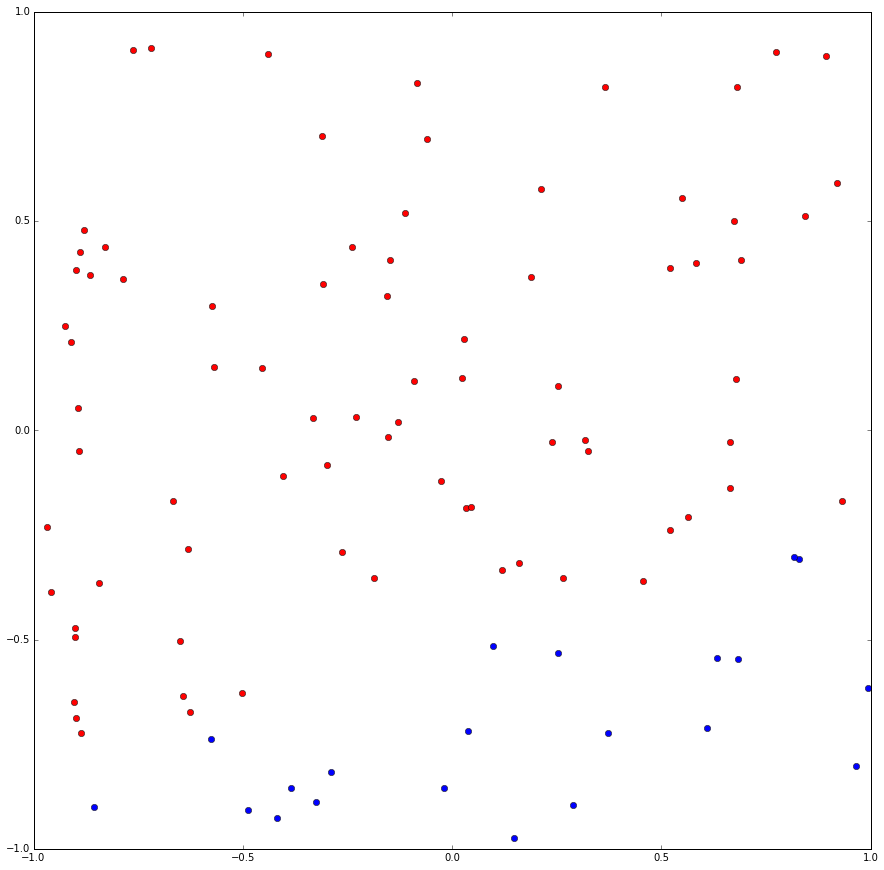

In [13]:
# Plot random points to ensure randomization works correctly
def test_random():
    random_points = generate_points(100)
    (w, labels) = assignment(random_points)
    plt.figure(figsize=(15,15))
    plt.plot(random_points[labels==1][:,1], random_points[labels==1][:,2], 'bo')
    plt.plot(random_points[labels==-1][:,1], random_points[labels==-1][:,2], 'ro')
    
test_random()

In [35]:
# Error function at a point
cross_entropy = lambda w, x, y: np.log(1 + np.exp(-y * np.dot(w,x)))

# Error function over all points
total_cross_entropy = lambda w, X, Y: np.mean([cross_entropy(w, X[i], Y[i]) for i in range(X.shape[0])])
    
# Gradient of error function
logistic_gradient = lambda w, x, y: (-y * x)/(1 + np.exp(y * np.dot(w,x)))
    
# Logistic regression algorithm
def logistic_regression(N_train, N_test):
    # Generate training points
    train_points, test_points = generate_points(N_train), generate_points(N_test)
    # Assign training labels, w_func is the function f to be modeled
    w_func, train_labels = assignment(train_points)
    # Assign test labels
    test_labels = np.sign(np.dot(test_points, w_func))
    
    # Initialize weight vector to all zeros, difference in weights to above 0.01, counter to 0
    w = np.zeros(3)
    w_diff = 1
    counter = 0
    learning_rate = 0.01
    
    # Iterate over epochs
    while w_diff > 0.01:
        w_prev = w
        # Choose a random permutation of training data to use (SGD)
        current_perm = np.random.permutation(N_train)
        # Iterate over each point
        for index in current_perm:
            x = train_points[index]
            y = train_labels[index]
            w = w - learning_rate * logistic_gradient(w, x, y)
        
        # Current iteration info        
        E_out = total_cross_entropy(w, test_points, test_labels)
        w_diff = np.linalg.norm(w_prev - w)
        counter += 1
        # Optional printing
        # print ("\tCurrent weights: {}".format(w))
        # print ("\tCurrent w_diff: {}".format(w_diff))
        # print ("\tCurrent E_out: {}".format(E_out))
    return counter, w, w_diff, E_out
        
logistic_regression(100,1000)

(335,
 array([ 4.41143258, -3.97736165,  6.20298096]),
 0.0099979206787903698,
 0.1107229401853158)

In [36]:
# Iterate over 100 runs to obtain average E_out and average number of epochs
def logistic_avg(N_runs):
    E_outs, epochs = [], []
    for i in range(N_runs):
        counter, w, w_diff, E_out = logistic_regression(100,1000)
        E_outs.append(E_out)
        epochs.append(counter)
    return np.mean(E_outs), np.mean(epochs)

logistic_avg(100)

(0.10429327875913021, 335.99000000000001)